<a href="https://colab.research.google.com/github/MushisFil/MNIST_Fashion_Classifier/blob/main/Kaggle_MAIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Kaggle_Datasets/

/content/gdrive/MyDrive/Kaggle_Datasets


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle_Datasets/"

In [5]:
!kaggle competitions download -c mais-202-winter-2022

 69% 50.0M/72.6M [00:00<00:00, 86.9MB/s]
100% 72.6M/72.6M [00:00<00:00, 105MB/s] 


In [6]:
!unzip mais-202-winter-2022.zip -d mais
!ls -la

Archive:  mais-202-winter-2022.zip
  inflating: mais/label_int_to_str_mapping.csv  
  inflating: mais/sample_submission.csv  
  inflating: mais/test_images.npy    
  inflating: mais/train_images.npy   
  inflating: mais/train_labels.csv   
total 74363
-rw------- 1 root root       71 Apr  3 14:50 kaggle.json
drwx------ 2 root root     4096 Apr  5 22:11 mais
-rw------- 1 root root 76142422 Apr  5 22:11 mais-202-winter-2022.zip


In [7]:
train_images = np.load("mais/train_images.npy", allow_pickle=True)
test_images = np.load("mais/test_images.npy",allow_pickle=True)
train_labels = pd.read_csv("mais/train_labels.csv")
label_mapping = pd.read_csv("mais/label_int_to_str_mapping.csv")

In [8]:
train_images.shape

(50000, 28, 28)

In [9]:
test_images.shape

(20000, 28, 28)

In [10]:
train_labels

,ID,label
0,0,6
1,1,4
2,2,6
3,3,1
4,4,8
...,...,...
49995,49995,0
49996,49996,9
49997,49997,7
49998,49998,3


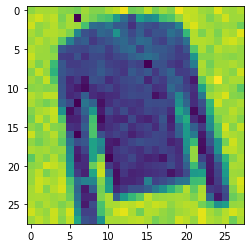

In [11]:
def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

show_image(train_images[5]) # 0 is the index of the training image you want to display

In [12]:
# Reshape and normalize the images
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) 
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)) 
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


In [13]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from keras.losses import SparseCategoricalCrossentropy

In [14]:

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=10, activation='softmax'))


model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels['label'], epochs=20) # y_train = train_labels['label]

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 49s 31ms/step - loss: 0.7524 - accuracy: 0.7159
Epoch 2/20
1563/1563 [==============================] - 46s 30ms/step - loss: 0.5377 - accuracy: 0.7977
Epoch 3/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.4755 - accuracy: 0.8233
Epoch 4/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.4374 - accuracy: 0.8379
Epoch 5/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.4119 - accuracy: 0.8458
Epoch 6/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.3878 - accuracy: 0.8548
Epoch 7/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.3695 - accuracy: 0.8622
Epoch 8/20
1563/1563 [==============================] - 46s 29ms/step - loss: 0.3513 - accuracy: 0.8692
Epoch 9/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.3396 - accuracy: 0.8716
Epoch 10/20
1563/1563 [==============================] - 47s 30ms/step - lo

In [15]:
predictions = model.predict(test_images)  # predict probabilities for each of the 10 classes
print(predictions.shape)
print(predictions)

(20000, 10)
[[1.2873154e-24 7.4259655e-21 5.3103860e-26 ... 1.3027586e-12
  3.5691864e-25 1.0000000e+00]
 [1.1192632e-14 3.3511323e-19 6.1502533e-15 ... 2.5327683e-15
  1.5691964e-17 7.3803483e-07]
 [2.0778667e-02 4.7771465e-08 8.5725379e-01 ... 6.6297617e-10
  5.1632571e-05 7.7475519e-09]
 ...
 [2.3601674e-04 1.4220041e-04 1.8082341e-05 ... 4.5544812e-06
  3.7009613e-05 9.3000945e-06]
 [1.2587837e-04 1.9075226e-09 3.3945453e-05 ... 1.3435421e-06
  9.9910456e-01 8.3603055e-07]
 [2.2082285e-03 7.9055065e-09 2.3795922e-01 ... 7.7703339e-13
  5.4210233e-08 1.3754908e-13]]


Dress


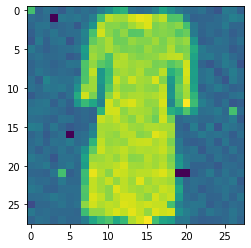

In [16]:
x = np.argmax(predictions[5]) # Example of prediction
print(label_mapping['str_label'][x])
show_image(test_images[5])

In [17]:
results = [0 for i in range(20000)]
data = [] # stores [[indices,prediction labels]]
for i in range(20000):
  results[i]=int(np.argmax(predictions[i]))
  data.append([i,results[i]])

df = pd.DataFrame(data, columns=['ID','label']) # Create dataframe from our results
df.to_csv('submission.csv',index=False) # Create csv file from DataFrame

In [18]:
df

,ID,label
0,0,9
1,1,5
2,2,2
3,3,1
4,4,8
...,...,...
19995,19995,0
19996,19996,2
19997,19997,4
19998,19998,8
